In [2]:
# Dependencies
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
# Adjust pandas display settings to show more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# Data source acknowledgement https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data
# The key data attributes are The "Vehicle Sales and Market Trends Dataset" provides a comprehensive 
# collection of information pertaining to the sales transactions of various vehicles. This dataset 
# encompasses details such as the year, make, model, trim, body type, transmission type, VIN 
# (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior 
# and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.

df = pd.read_csv('Resources/car_prices.csv')
df.head(50)

year       make                model                       trim  \
0   2015        Kia              Sorento                         LX   
1   2015        Kia              Sorento                         LX   
2   2014        BMW             3 Series                 328i SULEV   
3   2015      Volvo                  S60                         T5   
4   2014        BMW  6 Series Gran Coupe                       650i   
5   2015     Nissan               Altima                      2.5 S   
6   2014        BMW                   M5                       Base   
7   2014  Chevrolet                Cruze                        1LT   
8   2014       Audi                   A4  2.0T Premium Plus quattro   
9   2014  Chevrolet               Camaro                         LT   
10  2014       Audi                   A6      3.0T Prestige quattro   
11  2015        Kia               Optima                         LX   
12  2015       Ford               Fusion                         SE   
13  2015        Kia              Sorento                         LX   
14  2014  Chevrolet                Cruze                        2LT   
15  2015     Nissan               Altima                      2.5 S   
16  2015    Hyundai               Sonata                         SE   
17  2014       Audi                   Q5  2.0T Premium Plus quattro   
18  2014  Chevrolet               Camaro                         LS   
19  2014        BMW             6 Series                       650i   
20  2015  Chevrolet               Impala                        LTZ   
21  2014        BMW             5 Series                       528i   
22  2014  Chevrolet               Camaro                         LT   
23  2015       Audi                   A3           1.8 TFSI Premium   
24  2014        BMW             6 Series                       650i   
25  2015    Hyundai               Sonata                         SE   
26  2015      Volvo                 XC70                         T6   
27  2015      Volvo                 XC70                         T6   
28  2014        BMW                   X5                  sDrive35i   
29  2014  Chevrolet               Camaro                         LT   
30  2014  Chevrolet                Cruze                        1LT   
31  2014       Audi                  SQ5  3.0T Premium Plus quattro   
32  2015        Kia              Sorento                         LX   
33  2014       Audi                   S5       Premium Plus quattro   
34  2015        Kia              Sorento                         LX   
35  2014      Buick               Verano          Convenience Group   
36  2015  Chevrolet             Suburban                        LTZ   
37  2014        BMW             3 Series                 328i SULEV   
38  2014        BMW                   M5                       Base   
39  2014        BMW             3 Series                 328i SULEV   
40  2014   Cadillac                  ELR                       Base   
41  2015    Hyundai               Sonata                         SE   
42  2014        BMW             6 Series                       650i   
43  2015      Volvo                  V60                         T5   
44  2014  Chevrolet                Cruze                        1LT   
45  2014        BMW                   X6                  xDrive35i   
46  2015      Volvo                  V60                         T5   
47  2014  Chevrolet                Cruze                        2LT   
48  2014      Acura                  ILX         Technology Package   
49  2015        Kia              Sorento                         LX   

           body transmission                vin state  condition  odometer  \
0           SUV    automatic  5xyktca69fg566472    ca        5.0   16639.0   
1           SUV    automatic  5xyktca69fg561319    ca        5.0    9393.0   
2         Sedan    automatic  wba3c1c51ek116351    ca       45.0    1331.0   
3         Sedan    automatic  yv1612tb4f1310987    ca       41.0   142

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'mmr'}>],
       [<Axes: title={'center': 'sellingprice'}>, <Axes: >]], dtype=object)

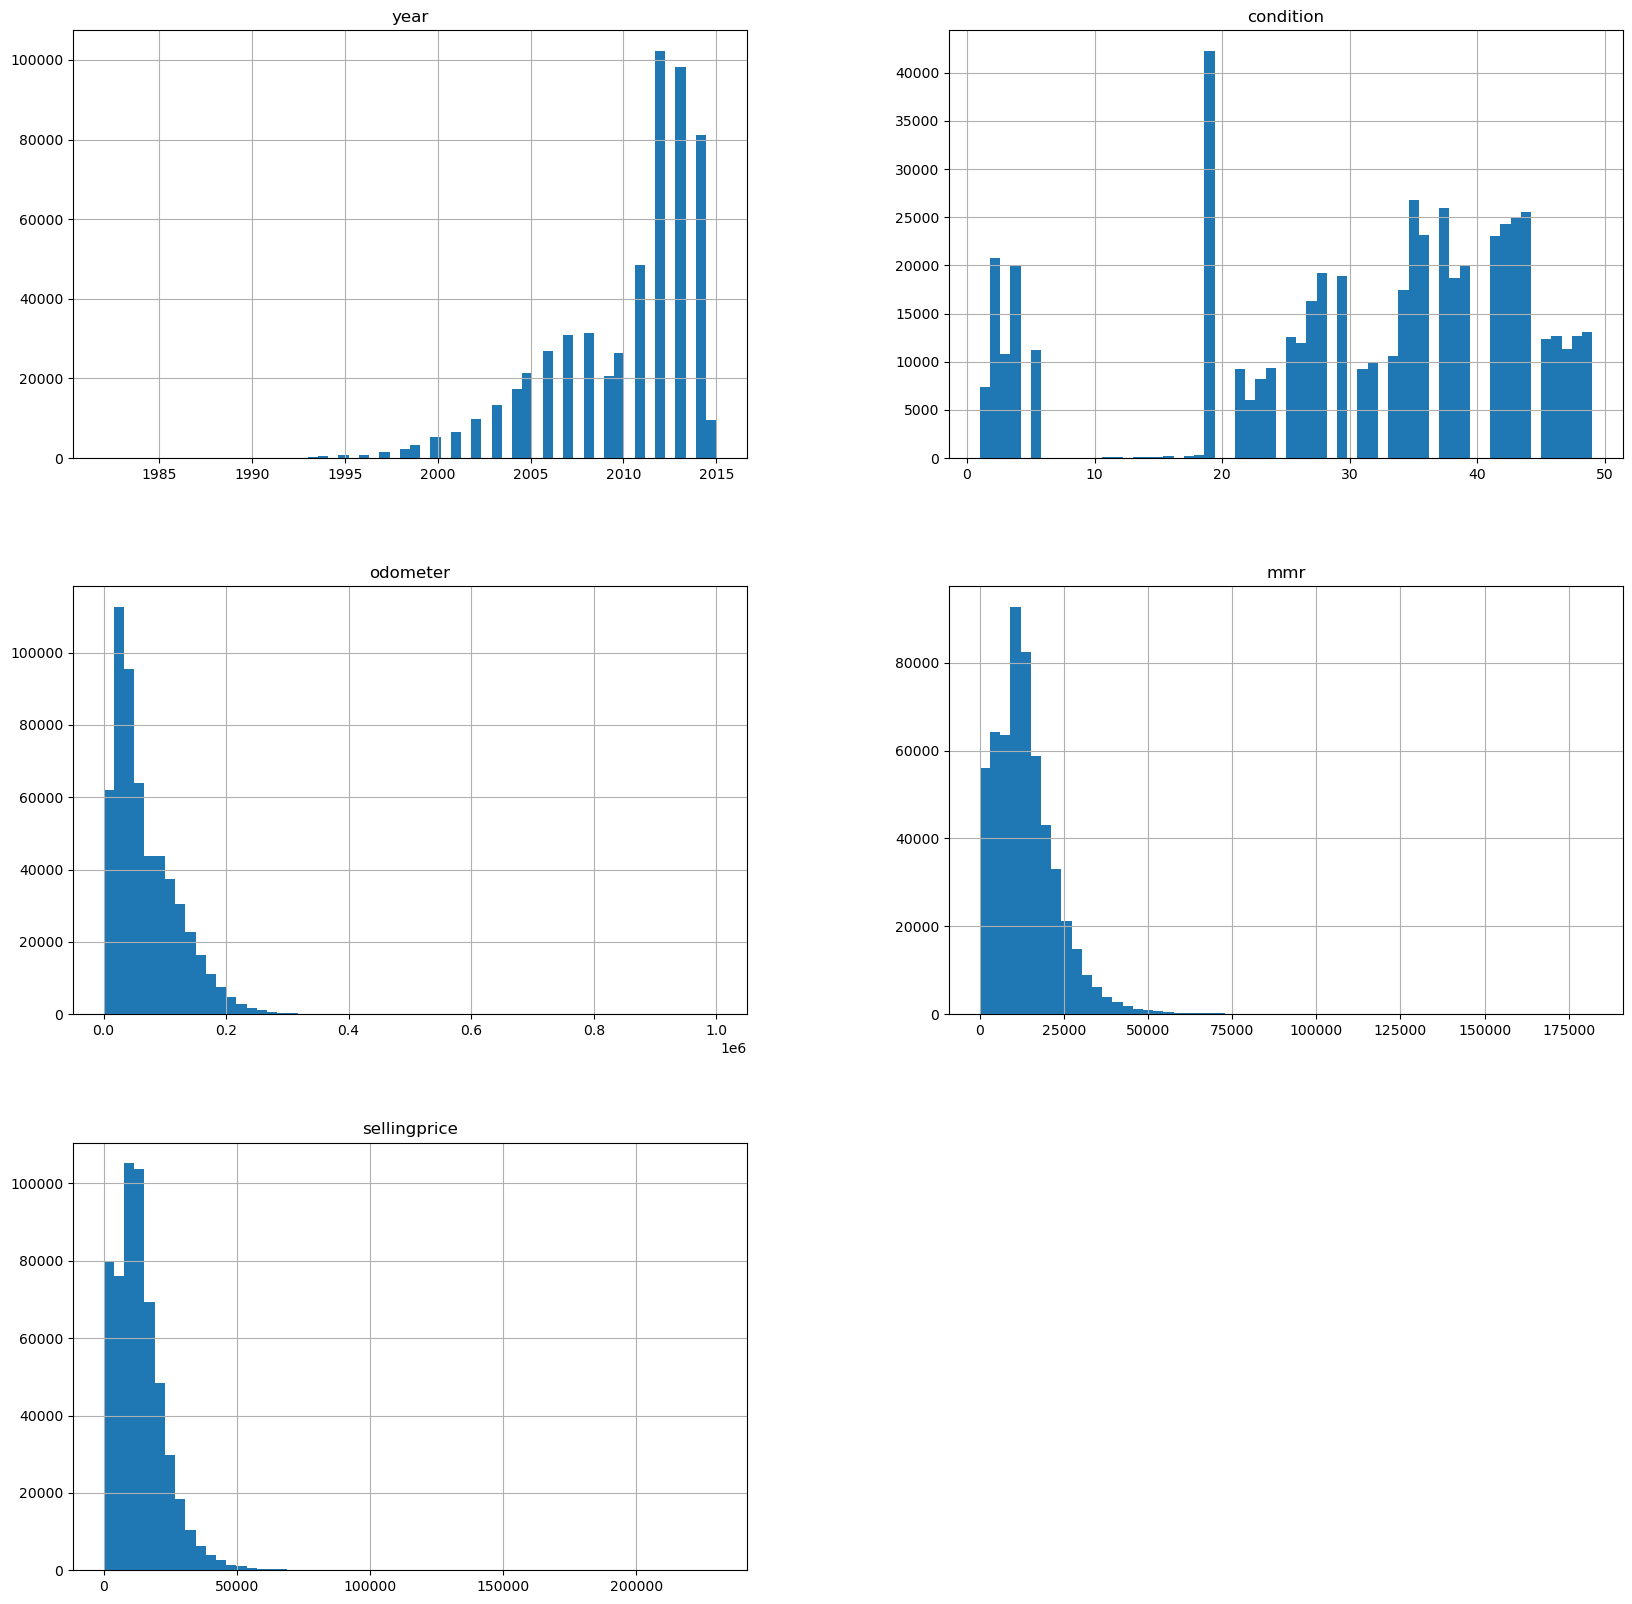

In [5]:
# Inspect data with histograms to save time
df.hist(bins=60, figsize=(20,20))

In [6]:
# Inspect data types, columns, assess missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [7]:
# Look at number of rows and columns
df.shape

(558837, 16)

In [8]:
# Extract list of column headers
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [9]:
# Look for null values
print(df.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [10]:
# Assess missing values as a percentage of total missing values
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64


In [11]:
# Based on the analysis above the dataframe seems reasonsable for further investigation

In [12]:
# tranmission has a very high percentage of missing values. We should look at it more closely.
frequency_of_unique_entries = df['transmission'].value_counts()
print("Frequency of each unique entry:\n", frequency_of_unique_entries)

Frequency of each unique entry:
 transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64


In [13]:
# sedan and Sedan are out of place. Let's make a dataframe that contains this sedan/Sedan data
sedan_df = df[df['transmission'].isin(['sedan', 'Sedan'])]

sedan_df.head()


year        make  model                    trim         body  \
408161  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
417835  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
421289  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
424161  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
427040  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   

       transmission        vin              state  condition  odometer  color  \
408161        Sedan  automatic  3vwd17aj4fm201708        NaN      46.0   4802   
417835        Sedan  automatic  3vwd17aj2fm258506        NaN       1.0   9410   
421289        Sedan  automatic  3vwd17aj3fm276741        NaN      46.0   1167   
424161        Sedan  automatic  3vwd17aj2fm285365        NaN       1.0   2172   
427040        Sedan  automatic  3vwd17aj0fm227318        NaN      41.0  14872   

       interior seller  mmr  sellingprice saledate  
408161   silver   gray  NaN       13200.0    16500  
417835    white   gray  NaN       13300.0    10500  
421289     blue  black  NaN       13200.0    12700  
424161     gray  black  NaN       14050.0     8250  
427040     gray  black  NaN       13700.0    14300

In [14]:
# There are 26 entries. After inspecting the entire DataFrame with sedan_df.head() the problem appears to related to a shift
# in the column as a result of the trim name leaching in to the body name. Also there are NaN entreis for transmission. I'm
# rplacing the NaN's with automatic

sedan_df['vin'].fillna('automatic', inplace=True)

C:\Users\mford.MSBIOWORKS\AppData\Local\Temp\ipykernel_16444\1765834904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sedan_df['vin'].fillna('automatic', inplace=True)


In [15]:
# The transmission values have been fixed and now the frames need shifting.

sedan_df.head(50)

year        make  model                    trim         body  \
408161  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
417835  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
421289  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
424161  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
427040  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
427043  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
434424  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
444501  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
453794  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
461597  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
461612  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
492484  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
497008  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
497011  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
499083  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
501455  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
505299  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
505306  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
520461  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
528996  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
529009  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
529013  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
529622  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
548784  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
551222  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
554710  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   

       transmission        vin              state  condition  odometer  color  \
408161        Sedan  automatic  3vwd17aj4fm201708        NaN      46.0   4802   
417835        Sedan  automatic  3vwd17aj2fm258506        NaN       1.0   9410   
421289        Sedan  automatic  3vwd17aj3fm276741        NaN      46.0   1167   
424161        Sedan  automatic  3vwd17aj2fm285365        NaN       1.0   2172   
427040        Sedan  automatic  3vwd17aj0fm227318        NaN      41.0  14872   
427043        Sedan  automatic  3vwd17aj6fm218641        NaN      49.0  12655   
434424        Sedan  automatic  3vwd17aj7fm223475        NaN      46.0  15719   
444501        Sedan  automatic  3vwd17aj5fm297123        NaN       2.0   6388   
453794        Sedan  automatic  3vwd17aj5fm219943        NaN      44.0  16633   
461597        Sedan  automatic  3vwd17aj9fm219766        NaN      44.0  11034   
461612        Sedan  automatic  3vwd17aj3fm259017        NaN      46.0   2711   
492484        sedan  automatic  3vwd17aj5fm206111        NaN       2.0   6864   
497008        sedan  automatic  3vwd17aj5fm273601        NaN      28.0    339   
497011        sedan  automatic  3vwd17aj5fm221322        NaN      48.0  18384   
499083        sedan  automatic  3vwd17aj5fm268964        NaN       2.0   9887   
501455        sedan  automatic  3vwd17aj6fm231972        NaN      38.0   9837   
505299        sedan  automatic  3vwd17aj7fm222388        NaN      36.0  20379   
505306        sedan  automatic  3vwd17aj7fm218440        NaN      42.0  20627   
520461        sedan  automatic  3vwd17ajxfm315938        NaN       1.0    721   
528996        sedan  automatic  3vwd17aj7fm229552        NaN      38.0   6158   
529009        sedan  automatic  3vwd17aj8fm298895        NaN       2.0   2817   
529013        sedan  automatic  3vwd17aj4fm236636        NaN       5.0   5705   
529622        sedan  automatic  3vwd17aj5fm225953        NaN      41.0  18561   
548784        sedan  automatic  3vwd17aj7fm326640        NaN       2.0   2846   
551222        sedan  automatic  3vwd17

In [16]:
# Create a copy of the original DataFrame to make modifications
new_sedan_df = sedan_df.copy()

# Append ", Navigation" to every entry in the 'trim' column of the new DataFrame
new_sedan_df['trim'] = new_sedan_df['trim'].astype(str) + ', Navigation'

# Display the first few rows of the new DataFrame to verify the changes
new_sedan_df.head()

year        make  model                                trim  \
408161  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation   
417835  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation   
421289  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation   
424161  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation   
427040  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation   

               body transmission        vin              state  condition  \
408161  Navitgation        Sedan  automatic  3vwd17aj4fm201708        NaN   
417835  Navitgation        Sedan  automatic  3vwd17aj2fm258506        NaN   
421289  Navitgation        Sedan  automatic  3vwd17aj3fm276741        NaN   
424161  Navitgation        Sedan  automatic  3vwd17aj2fm285365        NaN   
427040  Navitgation        Sedan  automatic  3vwd17aj0fm227318        NaN   

        odometer  color interior seller  mmr  sellingprice saledate  
408161      46.0   4802   silver   gray  NaN       13200.0    16500  
417835       1.0   9410    white   gray  NaN       13300.0    10500  
421289      46.0   1167     blue  black  NaN       13200.0    12700  
424161       1.0   2172     gray  black  NaN       14050.0     8250  
427040      41.0  14872     gray  black  NaN       13700.0    14300

In [17]:
# shift the cells
new_sedan_df.iloc[:, 4:] = new_sedan_df.iloc[:, 4:].shift(-1, axis=1)
new_sedan_df.head(50)


year        make  model                                trim   body  \
408161  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  Sedan   
417835  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  Sedan   
421289  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  Sedan   
424161  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  Sedan   
427040  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  Sedan   
427043  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  Sedan   
434424  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  Sedan   
444501  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  Sedan   
453794  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  Sedan   
461597  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  Sedan   
461612  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  Sedan   
492484  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
497008  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
497011  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
499083  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
501455  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
505299  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
505306  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
520461  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
528996  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
529009  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
529013  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
529622  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
548784  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
551222  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   
554710  2015  Volkswagen  Jetta  SE PZEV w/Connectivity, Navigation  sedan   

       transmission                vin state  condition odometer   color  \
408161    automatic  3vwd17aj4fm201708   NaN       46.0     4802  silver   
417835    automatic  3vwd17aj2fm258506   NaN        1.0     9410   white   
421289    automatic  3vwd17aj3fm276741   NaN       46.0     1167    blue   
424161    automatic  3vwd17aj2fm285365   NaN        1.0     2172    gray   
427040    automatic  3vwd17aj0fm227318   NaN       41.0    14872    gray   
427043    automatic  3vwd17aj6fm218641   NaN       49.0    12655     red   
434424    automatic  3vwd17aj7fm223475   NaN       46.0    15719    blue   
444501    automatic  3vwd17aj5fm297123   NaN        2.0     6388   white   
453794    automatic  3vwd17aj5fm219943   NaN       44.0    16633  silver   
461597    automatic  3vwd17aj9fm219766   NaN       44.0    11034   black   
461612    automatic  3vwd17aj3fm259017   NaN       46.0     2711   white   
492484    automatic  3vwd17aj5fm206111   NaN        2.0     6864    gray   
497008    automatic  3vwd17aj5fm273601   NaN       28.0      339   black   
497011    automatic  3vwd17aj5fm221322   NaN       48.0    18384  silver   
499083    automatic  3vwd17aj5fm268964   NaN        2.0     9887     red   
501455    automatic  3vwd17aj6fm231972   NaN       38.0     9837     red   
505299    automatic  3vwd17aj7fm222388   NaN       36.0    20379  silver   
505306    automatic  3vwd17aj7fm218440   NaN       42.0    20627   white   
520461    automatic  3vwd17ajxfm315938   NaN        1.0      721    blue   
528996    automatic  3vwd17aj7fm229552   NaN       38.0     6158   black   
529009    automatic  3vwd17aj8fm298895   NaN        2.0     2817     red   
529013    automatic  3vwd17aj4fm236636   NaN        5.0     5705       —   
529622    automatic  3vwd17aj5fm225953   NaN       41.0    18561   black   
548784    automatic  3vwd17aj7fm326640   NaN        2.0     2846    blue   
5

In [18]:
print(new_sedan_df.isnull().sum())

year             0
make             0
model            0
trim             0
body             0
transmission     0
vin              0
state           26
condition        0
odometer         0
color            0
interior         0
seller          26
mmr              0
sellingprice     0
saledate        26
dtype: int64


In [19]:
# df.update(new_sedan_df)

df = df[df['transmission'].str.lower() != 'sedan']


In [20]:
unique_state = df['state'].unique()
unique_state

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

In [21]:
# Assess missing values as a percentage of total missing values
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

year             0.000000
make             1.843378
model            1.860915
trim             1.906011
body             2.361263
transmission    11.694831
vin              0.000000
state            0.000000
condition        2.110553
odometer         0.016821
color            0.134035
interior         0.134035
seller           0.000000
mmr              0.002147
sellingprice     0.002147
saledate         0.002147
dtype: float64


In [22]:
# sedan/Sedan has beeen removed from the tranmission column but the column still contains a lot of null values
frequency_of_unique_entries = df['transmission'].value_counts()
print("Frequency of each unique entry:\n", frequency_of_unique_entries)

Frequency of each unique entry:
 transmission
automatic    475915
manual        17544
Name: count, dtype: int64


In [23]:
# Look for null values
print(df.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                12
sellingprice       12
saledate           12
dtype: int64


In [24]:
# Lets look at makes in the same way we did transmission

In [25]:
unique_makes = df['make'].unique()

In [26]:
print(unique_makes)

['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']


In [27]:
# sedan and Sedan are out of place. Let's make a dataframe that contains this sedan/Sedan data
dot_df = df[df['make'].isin(['dot'])]

dot_df.head()

year make    model trim body transmission                vin state  \
49275  1998  dot  durango  NaN  NaN    automatic  1b4hs28yxwf151692    az   

       condition  odometer   color interior                 seller    mmr  \
49275       19.0  191734.0  silver     gray  southwest title loans  850.0   

       sellingprice                                 saledate  
49275         500.0  Tue Dec 23 2014 11:00:00 GMT-0800 (PST)

In [28]:
# lot's of problems to address and questions raised. Quick fix rename columns lacking capitalization

replacement_make_dict = {
    'lincoln': 'Lincoln',
    'bmw': 'BMW',
    'pontiac': 'Pontiac',
    'suzuki': 'Suzuki',
    'kia': 'Kia',
    'ford': 'Ford',
    'mitsubishi': 'Mitsubishi',
    'smart': 'Smart',
    'chevrolet': 'Chevrolet',
    'chrysler': 'Chrysler',
    'landrover': 'Landrover',
    'cadillac': 'Cadillac',
    'land rover': 'Landrover',
    'mercedes': 'Mercedes',
    'mazda': 'Mazda',
    'toyota': 'Toyota',
    'lexus': 'Lexus',
    'honda': 'Honda',
    'nissan': 'Nissan',
    'porsche': 'Porsche',
    'dodge': 'Dodge',
    'subaru': 'Subaru',
    'oldsmobile': 'Oldsmobile',
    'hyundai': 'Hyundai',
    'jeep': 'Jeep',
    'acura': 'Acura',
    'volkswagen': 'Volkswagen',
    'audi': 'Audi',
    'gmc': 'GMC',
    'maserati':  'Maserati',
    'mercury': 'Mercury',
    'buick': 'Buick',
    'vw': 'Volkswagen',
    'plymouth': 'Plymouth',
    'dodge tk': 'Dodge',
    'mazda tk': 'Mazda',
    'hyundai tk': 'Hyundai',
    'mercedes-b': 'Mercedes',
    'chev truck': 'Chevrolet',
    'ford tk': 'Ford',
    'ford truck': 'Ford',
    'airstream': 'Airstream',
    'dot':'Dodge',
    'gmc truck': 'GMC'
    
    # Add more replacements as needed
}

df['make'] = df['make'].replace(replacement_make_dict)



In [29]:
unique_makes = df['make'].unique()

In [30]:
print(unique_makes)

['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'Jaguar' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'Porsche' nan 'Dodge' 'FIAT' 'Chrysler' 'Ferrari'
 'Honda' 'GMC' 'Ram' 'Smart' 'Bentley' 'Pontiac' 'Saturn' 'Maserati'
 'Mercury' 'HUMMER' 'Landrover' 'Mercedes' 'Saab' 'Suzuki' 'Oldsmobile'
 'Isuzu' 'Geo' 'Rolls-Royce' 'Daewoo' 'Plymouth' 'Tesla' 'Airstream'
 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']


In [31]:
make_counts = df['make'].value_counts()

print(make_counts)


make
Ford             94001
Chevrolet        60588
Nissan           54017
Toyota           39966
Dodge            30957
Honda            27351
Hyundai          21837
BMW              20793
Kia              18084
Chrysler         17485
Mercedes-Benz    17141
Jeep             15483
Infiniti         15305
Volkswagen       12603
Lexus            11980
GMC              10649
Mazda             8509
Cadillac          7629
Acura             5926
Audi              5877
Lincoln           5786
Buick             5121
Subaru            5103
Ram               4574
Pontiac           4524
Mitsubishi        4257
Volvo             3788
MINI              3224
Saturn            2841
Mercury           2023
Land Rover        1735
Scion             1687
Jaguar            1420
Porsche           1402
Suzuki            1078
FIAT               865
HUMMER             805
Saab               484
Smart              396
Oldsmobile         384
Isuzu              204
Landrover          156
Maserati           136
Bentle

In [32]:
# A DataFrame was made an inspected for the oddly named cars. This information was fed back into above to correct all the
# Vehicle names.

# # List of specified 'make' values
# specified_makes = [
#     'ford truck',
#     'mercedes-b',
#     'airstream',
#     'dot',
#     'hyundai tk',
#     'ford tk',
#     'chev truck',
#     'mazda tk',
#     'dodge tk'
# ]

# # Filter the DataFrame to include only the rows where 'make' is in the specified_makes list
# filtered_df = df[df['make'].isin(specified_makes)]

# # Optional: Check the counts to verify
# filtered_df


In [33]:
make_df = df[df['make'].isna()]

In [34]:
# Assess missing values as a percentage of total missing values
missing_percentage = make_df.isnull().sum() / len(make_df) * 100
print(missing_percentage)

year              0.000000
make            100.000000
model           100.000000
trim            100.000000
body            100.000000
transmission     17.095428
vin               0.000000
state             0.000000
condition         0.844578
odometer          0.038831
color             0.145617
interior          0.145617
seller            0.000000
mmr               0.000000
sellingprice      0.000000
saledate          0.000000
dtype: float64


In [35]:
# Inspect data types, columns, assess missing values
make_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10301 entries, 742 to 558776
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          10301 non-null  int64  
 1   make          0 non-null      object 
 2   model         0 non-null      object 
 3   trim          0 non-null      object 
 4   body          0 non-null      object 
 5   transmission  8540 non-null   object 
 6   vin           10301 non-null  object 
 7   state         10301 non-null  object 
 8   condition     10214 non-null  float64
 9   odometer      10297 non-null  float64
 10  color         10286 non-null  object 
 11  interior      10286 non-null  object 
 12  seller        10301 non-null  object 
 13  mmr           10301 non-null  float64
 14  sellingprice  10301 non-null  float64
 15  saledate      10301 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 1.3+ MB


In [36]:
# For all of the when rows when make is NaN model, trim and body are also NaN. These rows can all be removed.
df = df.dropna(subset=['make']).reset_index(drop=True)

In [37]:
# Look for null values
print(df.isnull().sum())

year                0
make                0
model              98
trim              350
body             2894
transmission    63591
vin                 0
state               0
condition       11707
odometer           90
color             734
interior          734
seller              0
mmr                12
sellingprice       12
saledate           12
dtype: int64


In [38]:
# As above let's take a look at body
unique_body_counts = df['body'].value_counts()

# Sort the counts alphabetically by seller name
unique_body_sorted_alphabetically = unique_body_counts.sort_index()

print(unique_body_sorted_alphabetically)

# unique_body_list = list(unique_body_sorted_alphabetically.items())
# print(unique_body_list)

# unique_body_dict = unique_body_sorted_alphabetically.to_dict()
# print(unique_body_dict)


body
Access Cab                    232
Beetle Convertible             52
CTS Coupe                     129
CTS Wagon                      13
CTS-V Coupe                    28
CTS-V Wagon                     1
Cab Plus                        4
Cab Plus 4                      5
Club Cab                      156
Convertible                  8652
Coupe                       14602
Crew Cab                    13280
CrewMax Cab                   445
Double Cab                   1251
E-Series Van                 1455
Elantra Coupe                  80
Extended Cab                 3824
G Convertible                 249
G Coupe                      1263
G Sedan                      5999
G37 Convertible                16
G37 Coupe                      11
Genesis Coupe                 232
GranTurismo Convertible         7
Hatchback                   21380
King Cab                      436
Koup                          147
Mega Cab                       59
Minivan                     21363
Promaster

In [39]:
# lot's of problems to address and questions raised. Quick fix rename columns lacking capitalization

replacement_body_dict = {
    'Beetle Convertible': 'Convertible',
    'CTS Coupe': 'Coupe',
    'CTS Wagon': 'Wagon',
    'CTS-V Coupe': 'Coupe',
    'CTS-V Wagon': 'Wagon',
    'E-Series Van': 'Van',
    'Elantra Coupe': 'Coupe',
    'G Convertible': 'Convertible',
    'G Coupe': 'Coupe',
    'G Sedan': 'Sedan',
    'G37 Convertible': 'Convertible',
    'G37 Coupe': 'Coupe',
    'Genesis Coupe': 'Coupe',
    'GranTurismo Convertible': 'Convertible',
    'Koup': 'Coupe',
    'Promaster Cargo Van': 'Van',
    'Q60 Convertible': 'Convertible',
    'Q60 Coupe': 'Coupe',
    'TSX Sport Wagon': 'Wagon',
    'Transit Van' : 'Van',
    'beetle convertible': 'Convertible',
    'convertible': 'Convertible',
    'coupe': 'Coupe',
    'cts coupe': 'Coupe',
    'cts wagon': 'Wagon',
    'cts-v coupe': 'Coupe',
    'e-series van': 'Van',
    'elantra coupe': 'Coupe',
    'g convertible': 'Convertible',
    'g coupe': 'Coupe',
    'g sedan': 'Sedan',
    'g37 convertible': 'Convertible',
    'g37 coupe': 'Coupe',
    'genesis coupe': 'Coupe',
    'granturismo convertible':'Convertible',
    'minivan': 'Minivan',
    'promaster cargo van': 'Van',
    'q60 convertible': 'Convertible',
    'q60 coupe': 'Coupe',
    'sedan': 'Sedan',
    'suv': 'SUV',
    'transit van': 'Van',
    'tsx sport wagon': 'Wagon',
    'van': 'Van',
    'wagon': 'Wagon',
    'koup': 'Coupe',
    'Ram Van': 'Van',
    'hatchback': 'Hatchback'
    }

df['body'] = df['body'].replace(replacement_body_dict)


In [40]:
# As above let's take a look at body
unique_body_counts = df['body'].value_counts()

# Sort the counts alphabetically by seller name
unique_body_sorted_alphabetically = unique_body_counts.sort_index()

print(unique_body_sorted_alphabetically)

#That leaves the trucks! Truck naming was taken from this website: https://www.carmax.com/articles/truck-cab-styles-explained


body
Access Cab         232
Cab Plus             4
Cab Plus 4           5
Club Cab           156
Convertible      10933
Coupe            20163
Crew Cab         13280
CrewMax Cab        445
Double Cab        1251
Extended Cab      3824
Hatchback        26237
King Cab           436
Mega Cab            59
Minivan          25529
Quad Cab          3436
Regular Cab       4067
SUV             143844
Sedan           248760
SuperCab          4449
SuperCrew         7423
Van               6430
Wagon            16180
Xtracab             40
access cab          62
cab plus 4           1
club cab            22
crew cab          3114
crewmax cab        120
double cab         350
extended cab       683
king cab            96
mega cab            52
quad cab           659
regular cab        783
regular-cab         15
supercab           862
supercrew         1610
xtracab              4
Name: count, dtype: int64


In [41]:
replacement_body_dict_trucks = {
    'SuperCab': 'Super Cab',
    'access cab': 'Access Cab',
    'cab plus 4': 'Cab Plus 4',
    'club cab': 'Club Cab',
    'crew cab': 'Crew Cab',
    'crewmax cab': 'CrewMax Cab',
    'double cab': 'Double Cab',
    'extended cab': 'Extended Cab',
    'king cab': 'King Cab',
    'mega cab': 'Mega Cab',
    'quad cab': 'Quad Cab',
    'regular cab': 'Regular Cab',
    'regular-cab':'Regular Cab',
    'supercab': 'Super Cab',
    'supercrew': 'SuperCrew',
    'xtracab': 'Xtracab',
    }

df['body'] = df['body'].replace(replacement_body_dict_trucks)


In [42]:
# As above let's take a look at body
unique_body_counts = df['body'].value_counts()

# Sort the counts alphabetically by seller name
unique_body_sorted_alphabetically = unique_body_counts.sort_index()

print(unique_body_sorted_alphabetically)

#That leaves the trucks! Truck naming was taken from this website: https://www.carmax.com/articles/truck-cab-styles-explained


body
Access Cab         294
Cab Plus             4
Cab Plus 4           6
Club Cab           178
Convertible      10933
Coupe            20163
Crew Cab         16394
CrewMax Cab        565
Double Cab        1601
Extended Cab      4507
Hatchback        26237
King Cab           532
Mega Cab           111
Minivan          25529
Quad Cab          4095
Regular Cab       4865
SUV             143844
Sedan           248760
Super Cab         5311
SuperCrew         9033
Van               6430
Wagon            16180
Xtracab             44
Name: count, dtype: int64


In [43]:
unique_color = df['color'].unique()

In [44]:
print(unique_color)

['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' nan 'orange'
 'off-white' 'turquoise' 'pink' 'lime']


In [45]:
df = df[(df['color'].notna()) & (df['color'] != '—')]

In [46]:
unique_color = df['color'].unique()

In [47]:
print(unique_color)

['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' 'gold' 'yellow' 'green' 'charcoal' 'orange' 'off-white'
 'turquoise' 'pink' 'lime']


In [48]:
replacement_color_dict = {
    'off-white': 'cream',
    
    }

df['color'] = df['color'].replace(replacement_color_dict)

In [49]:
unique_color = df['color'].unique()

In [50]:
print(unique_color)

['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' 'gold' 'yellow' 'green' 'charcoal' 'orange' 'cream'
 'turquoise' 'pink' 'lime']


In [51]:
unique_color_counts = df['color'].value_counts()

print(unique_color_counts)


color
black        109148
white        104295
silver        81872
gray          81845
blue          50061
red           42761
gold          10994
green         10947
beige          8987
burgundy       8798
brown          6637
orange         2007
purple         1526
cream          1421
yellow         1235
charcoal        473
turquoise       225
pink             42
lime             15
Name: count, dtype: int64


In [52]:
unique_interior = df['interior'].unique()
print(unique_interior)

['black' 'beige' 'tan' '—' 'gray' 'brown' 'burgundy' 'white' 'silver'
 'off-white' 'blue' 'red' 'yellow' 'green' 'purple' 'orange' 'gold']


In [53]:
replacement_interior_dict = {
    'off-white': 'cream',
        }

df['interior'] = df['interior'].replace(replacement_interior_dict)

In [54]:
df = df[(df['interior'].notna()) & (df['interior'] != '—')]

In [55]:
unique_interior = df['interior'].unique()
print(unique_interior)

['black' 'beige' 'tan' 'gray' 'brown' 'burgundy' 'white' 'silver' 'cream'
 'blue' 'red' 'yellow' 'green' 'purple' 'orange' 'gold']


In [56]:
# Look for null values
print(df.isnull().sum())


year                0
make                0
model              76
trim              309
body             2567
transmission    57976
vin                 0
state               0
condition        6352
odometer           50
color               0
interior            0
seller              0
mmr                11
sellingprice       11
saledate           11
dtype: int64


In [57]:
# Lets take a look at mmr
min_mmr = df['mmr'].min()
max_mmr = df['mmr'].max()

print(f"Minimum mmr value: {min_mmr}")
print(f"Maximum mmr value: {max_mmr}")


Minimum mmr value: 25.0
Maximum mmr value: 182000.0


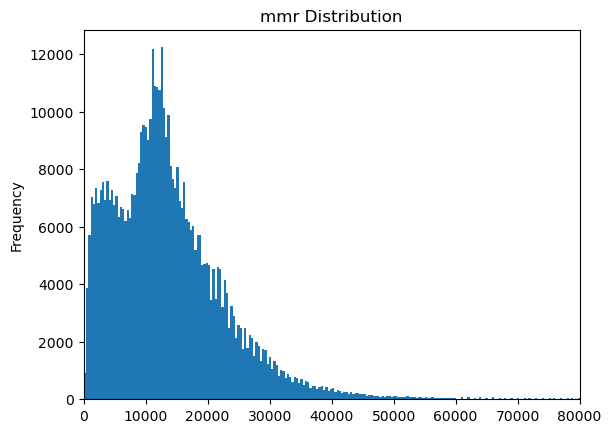

In [58]:
# Your histogram plotting command
df['mmr'].plot(kind='hist', bins=500, title='mmr Distribution')

# Now, adjust the x-axis to view only from 0 to 0.2
plt.xlim(0, 80000)

# Show the plot, especially necessary if you're not in a Jupyter notebook
plt.show()

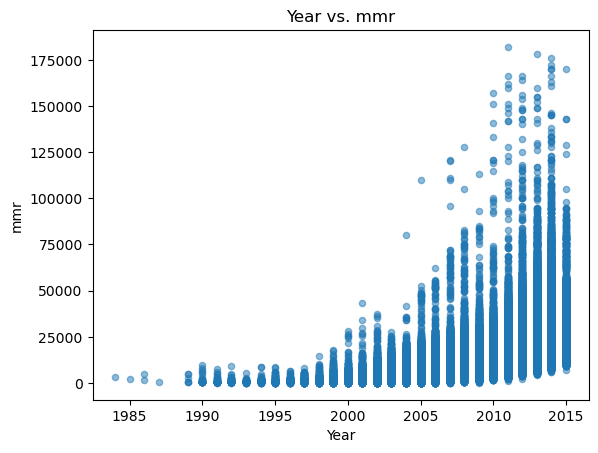

In [59]:
# Assuming 'year' and 'odometer' are columns in your DataFrame df
df.plot(kind='scatter', x='year', y='mmr', alpha=0.5)
plt.title('Year vs. mmr')
plt.xlabel('Year')
plt.ylabel('mmr')
plt.show()

In [60]:
unique_mmr = df['mmr'].unique()
print(unique_mmr)

[ 20500.  20800.  31900. ... 125000. 119000. 164000.]


In [61]:
unique_mmr_counts = df['mmr'].value_counts()
unique_mmr_counts

mmr
11650.0     1638
12500.0     1624
12150.0     1601
11300.0     1590
11850.0     1587
11600.0     1579
11750.0     1573
11350.0     1564
12350.0     1562
11050.0     1559
11250.0     1555
11700.0     1553
12200.0     1552
12700.0     1551
12050.0     1548
12750.0     1548
11950.0     1544
11500.0     1543
11900.0     1541
11400.0     1538
12400.0     1531
12000.0     1531
11550.0     1523
10950.0     1520
12650.0     1519
12600.0     1519
11800.0     1516
12800.0     1516
12450.0     1514
11150.0     1513
11450.0     1502
12250.0     1501
12100.0     1501
11100.0     1499
11200.0     1499
12300.0     1482
12950.0     1481
12850.0     1464
13000.0     1456
11000.0     1453
10900.0     1450
12550.0     1435
10850.0     1425
10800.0     1423
12900.0     1417
13050.0     1417
10650.0     1406
13100.0     1381
13400.0     1375
10750.0     1370
10500.0     1369
10700.0     1350
10600.0     1331
10150.0     1329
13450.0     1312
10100.0     1311
10200.0     1309
13300.0     1305
10050.0   

In [62]:
mmr_df = df[df['mmr'].isna()]
mmr_df.head()

year      make    model     trim   body transmission  \
301567  2013   Hyundai   Sonata      GLS  Sedan    automatic   
399257  2013  Chrysler      300     Base  Sedan    automatic   
414820  2013   Hyundai   Sonata      GLS  Sedan          NaN   
422003  2013  Chrysler      200  Touring  Sedan    automatic   
422019  2013     Dodge  Avenger      SXT  Sedan    automatic   

                      vin state  condition  odometer   color interior  \
301567  5npeb4ac6dh687932    il       19.0   37254.0    gray     gray   
399257  2c3ccaag9dh723146    il       27.0   44208.0  silver    black   
414820  5npeb4ac3dh735368    az       28.0   44299.0    blue     gray   
422003  1c3ccbbb9dn718531    il       25.0   47344.0   white    black   
422019  1c3cdzcg5dn741076    il       34.0   44525.0    gray    black   

         seller  mmr  sellingprice saledate  
301567  kfl llc  NaN           NaN      NaN  
399257  kfl llc  NaN           NaN      NaN  
414820  kfl llc  NaN           NaN      NaN  
422003  kfl llc  NaN           NaN      NaN  
422019  kfl llc  NaN           NaN      NaN

In [63]:
kfl_seller_df = df[df['seller'].isin(['kfl llc'])]
kfl_seller_df.head(50)



year      make    model     trim   body transmission  \
301567  2013   Hyundai   Sonata      GLS  Sedan    automatic   
399257  2013  Chrysler      300     Base  Sedan    automatic   
414820  2013   Hyundai   Sonata      GLS  Sedan          NaN   
422003  2013  Chrysler      200  Touring  Sedan    automatic   
422019  2013     Dodge  Avenger      SXT  Sedan    automatic   
422145  2013   Hyundai   Accent      GLS  Sedan    automatic   
424240  2013       Kia     Soul     Base  Wagon    automatic   
449595  2013     Dodge  Charger       SE  Sedan    automatic   
512953  2012      Ford   Fusion      SEL  Sedan    automatic   
527944  2012       Kia    Forte       LX  Sedan    automatic   
533187  2014   Hyundai   Accent      GLS  Sedan    automatic   

                      vin state  condition  odometer   color interior  \
301567  5npeb4ac6dh687932    il       19.0   37254.0    gray     gray   
399257  2c3ccaag9dh723146    il       27.0   44208.0  silver    black   
414820  5npeb4ac3dh735368    az       28.0   44299.0    blue     gray   
422003  1c3ccbbb9dn718531    il       25.0   47344.0   white    black   
422019  1c3cdzcg5dn741076    il       34.0   44525.0    gray    black   
422145  kmhct4ae7du450468    il        3.0   43135.0  silver     gray   
424240  kndjt2a5xd7765280    va       19.0   29465.0  silver    black   
449595  2c3cdxbg6dh688757    il       19.0   45355.0   white    black   
512953  3fahp0jg5cr241590    va       26.0   51648.0   black     gray   
527944  knaft4a22c5559983    md       25.0   30927.0  silver     gray   
533187  kmhct4ae0eu650738    il       19.0   26379.0    gray     gray   

         seller  mmr  sellingprice saledate  
301567  kfl llc  NaN           NaN      NaN  
399257  kfl llc  NaN           NaN      NaN  
414820  kfl llc  NaN           NaN      NaN  
422003  kfl llc  NaN           NaN      NaN  
422019  kfl llc  NaN           NaN      NaN  
422145  kfl llc  NaN           NaN      NaN  
424240  kfl llc  NaN           NaN      NaN  
449595  kfl llc  NaN           NaN      NaN  
512953  kfl llc  NaN           NaN      NaN  
527944  kfl llc  NaN           NaN      NaN  
533187  kfl llc  NaN           NaN      NaN

In [64]:
# Drop rows where 'mmr' is NaN
df = df.dropna(subset=['mmr'])


In [65]:
# Look for null values
print(df.isnull().sum())

year                0
make                0
model              76
trim              309
body             2567
transmission    57975
vin                 0
state               0
condition        6352
odometer           50
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506584 entries, 0 to 548509
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          506584 non-null  int64  
 1   make          506584 non-null  object 
 2   model         506508 non-null  object 
 3   trim          506275 non-null  object 
 4   body          504017 non-null  object 
 5   transmission  448609 non-null  object 
 6   vin           506584 non-null  object 
 7   state         506584 non-null  object 
 8   condition     500232 non-null  float64
 9   odometer      506534 non-null  float64
 10  color         506584 non-null  object 
 11  interior      506584 non-null  object 
 12  seller        506584 non-null  object 
 13  mmr           506584 non-null  float64
 14  sellingprice  506584 non-null  float64
 15  saledate      506584 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 65.7+ MB


In [67]:
odometer_df = df[df['odometer'].isna()]
odometer_df

year           make             model            trim          body  \
5100    2000  Mercedes-Benz           M-Class           ML320           SUV   
7542    2002           Ford  F-350 Super Duty             XLT      Crew Cab   
7659    1999           Ford              f150  4x4 ext lariat           NaN   
9676    2011            GMC            Acadia          Denali           SUV   
13270   2009      Chevrolet            Cobalt              LT         Coupe   
16417   2008        Mercury           Mariner              V6           SUV   
19886   2006       Chrysler        PT Cruiser            Base         Wagon   
20420   2006           Ford          Freestar              SE       Minivan   
22462   2005           Ford             Focus          ZX4 SE         Sedan   
22503   2005           Ford          Freestar              SE       Minivan   
22725   2005       Infiniti               G35            Base         Coupe   
23651   2004      Chevrolet    Silverado 1500              LS  Extended Cab   
24356   2004          Honda            Accord              LX         Sedan   
25186   2003          Buick           Century            Base         Sedan   
25452   2003      Chevrolet          Cavalier            Base         Sedan   
25975   2003      Landrover             range       rover hse           NaN   
26984   2002           Ford          Windstar     LX Standard       Minivan   
27492   2002         Toyota             Camry             XLE         Sedan   
27655   2001          Buick             Regal              LS         Sedan   
27687   2001      Chevrolet    Silverado 1500            Base  Extended Cab   
28190   2001  Mercedes-Benz           S-Class            S430         Sedan   
28370   2000      Chevrolet           venture      fwd ext ls           NaN   
28384   2000      Chevrolet            camaro             NaN           NaN   
28447   2000          Buick           LeSabre          Custom         Sedan   
28969   2000         Toyota             Camry              LE         Sedan   
29338   1998      Chevrolet            Blazer              LS           SUV   
29527   1998       Infiniti               QX4            Base           SUV   
37576   2014       Chrysler               200              LX         Sedan   
39504   2007      Chevrolet          Colorado              LT      Crew Cab   
40603   2003          Volvo              XC70            Base         Wagon   
40632   2002      Chevrolet             Tahoe              LS           SUV   
40951   2000         Toyota             Camry              CE         Sedan   
47414   2005        Mercury           Montego          Luxury         Sedan   
48741   2001  Mercedes-Benz           C-Class            C240         Sedan   
128772  2005           Ford         Freestyle         Limited         Wagon   
130411  2000         Toyota             Camry           LE V6         Sedan   
169045  2010          Honda            Accord        EX-L V-6         Sedan   
230570  2001            BMW          7 Series           740iL         Sedan   
248735  2008            Kia               Rio         Rio5 SX         Wagon   
250351  2004          Dodge    Sprinter Cargo     2500 140 WB           Van   
319830  2014           Ford            Fiesta              ST     Hatchback   
326127  2005         Toyota             Camry              SE         Sedan   
327734  2011            GMC       Sierra 1500             SLE  Extended Cab   
344757  2002          Buick             Regal              GS         Sedan   
402290  1999      Chevrolet            Malibu              LS         Sedan   
427760  2014     Volkswagen             Jetta         SE PZEV         Sedan   
435075  2012            BMW                X5       xDrive35d           SUV   
518068  2008           Ford             F-150             XLT     SuperCrew   
540476  2010      Chevrolet           Equinox             LT1           SUV   
548044  2009      Chevrolet               HHR             

In [68]:
frequency_of_unique_entries = odometer_df['make'].value_counts()
print("Frequency of each unique entry:\n", frequency_of_unique_entries)


Frequency of each unique entry:
 make
Chevrolet        12
Ford              9
Toyota            5
Buick             4
Mercedes-Benz     3
GMC               2
Mercury           2
Chrysler          2
Infiniti          2
Honda             2
BMW               2
Landrover         1
Volvo             1
Kia               1
Dodge             1
Volkswagen        1
Name: count, dtype: int64


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'mmr'}>],
       [<Axes: title={'center': 'sellingprice'}>, <Axes: >]], dtype=object)

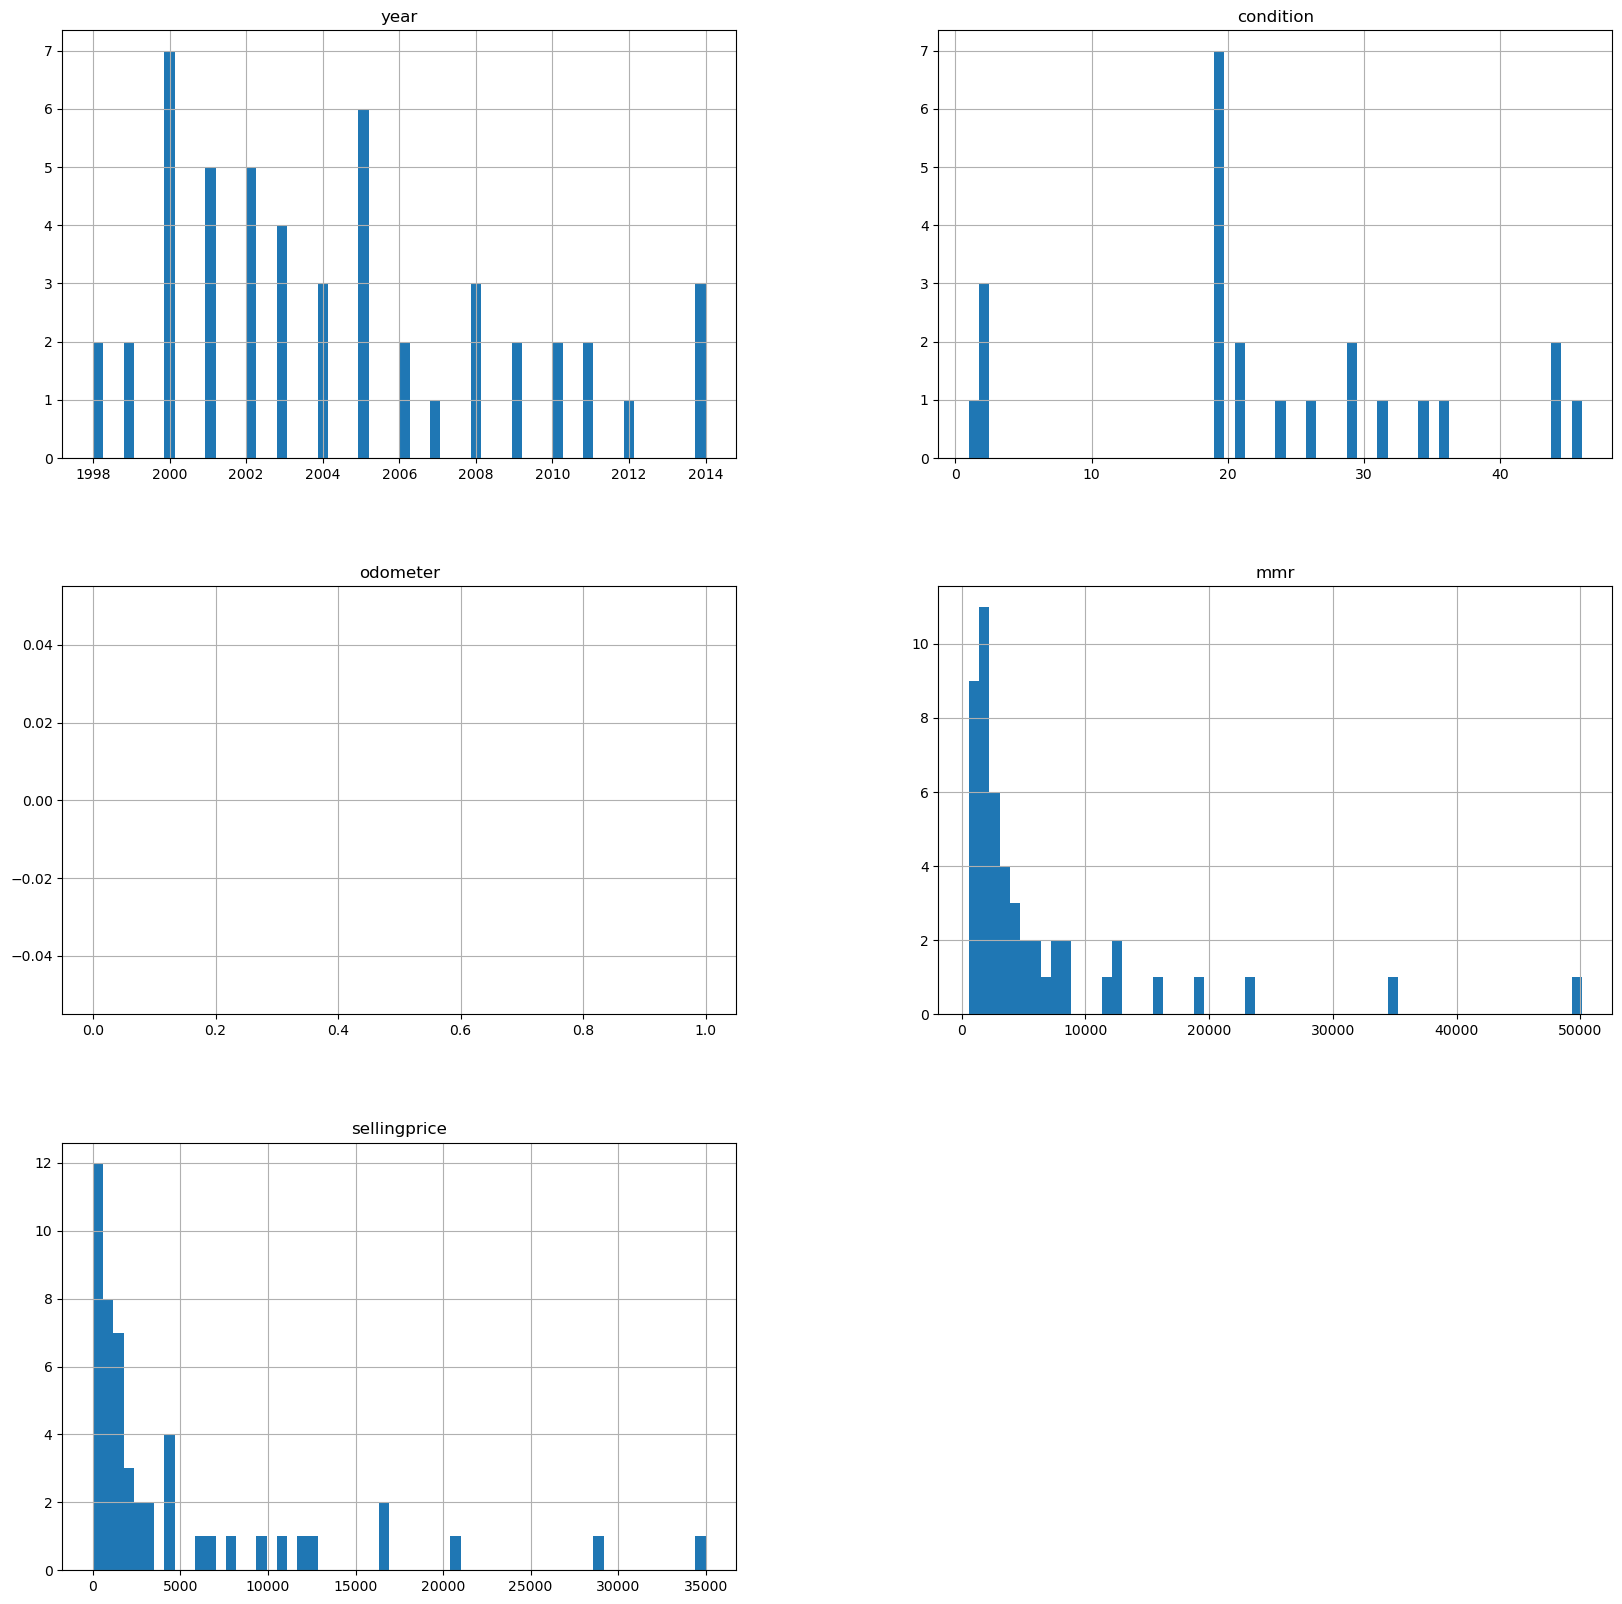

In [69]:
# Inspect data with histograms to save time
odometer_df.hist(bins=60, figsize=(20,20))

In [70]:
df = df.dropna(subset=['odometer'])

In [71]:
# Look for null values
print(df.isnull().sum())

year                0
make                0
model              76
trim              308
body             2563
transmission    57973
vin                 0
state               0
condition        6325
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [72]:
model_df = df[df['model'].isna()]
model_df.head()

year make model          trim   body transmission                vin  \
72     2014  BMW   NaN         750Li  Sedan    automatic  wbaye8c59ed134514   
31079  2014  BMW   NaN          750i  Sedan    automatic  wbaya8c52ed825069   
61688  2014  BMW   NaN  750Li xDrive  Sedan    automatic  wbayf8c57ed653381   
61709  2014  BMW   NaN  750Li xDrive  Sedan    automatic  wbayf8c57ed653316   
61715  2014  BMW   NaN  750Li xDrive  Sedan    automatic  wbayf8c59ed653334   

      state  condition  odometer   color interior  \
72       ca       43.0   12172.0   black    black   
31079    ga       44.0    4488.0  silver    black   
61688    oh       48.0     387.0   black    black   
61709    oh       48.0     361.0   black    black   
61715    oh        5.0     243.0   black    black   

                                       seller      mmr  sellingprice  \
72     financial services remarketing (lease)  67000.0       66000.0   
31079                          global imports  67000.0       64200.0   
61688               bmw na manheim new jersey  72000.0       72500.0   
61709               bmw na manheim new jersey  72000.0       78500.0   
61715               bmw na manheim new jersey  72000.0       73500.0   

                                      saledate  
72     Thu Dec 18 2014 12:30:00 GMT-0800 (PST)  
31079  Thu Dec 18 2014 10:00:00 GMT-0800 (PST)  
61688  Tue Dec 30 2014 14:00:00 GMT-0800 (PST)  
61709  Tue Dec 30 2014 14:00:00 GMT-0800 (PST)  
61715  Tue Dec 30 2014 14:00:00 GMT-0800 (PST)

In [73]:
frequency_of_unique_entries = model_df['make'].value_counts()
print("Frequency of each unique entry:\n", frequency_of_unique_entries)

Frequency of each unique entry:
 make
BMW     64
Audi    12
Name: count, dtype: int64


In [74]:
# As above let's take a look at body
unique_trim_counts = df['trim'].value_counts()

# Sort the counts alphabetically by seller name
unique_trim_sorted_alphabetically = unique_trim_counts.sort_index()

print(unique_trim_sorted_alphabetically)


trim
!                                                   446
& coun fwd                                            1
& coun fwd limited                                    3
& coun fwd lx                                         7
& country lx                                         15
(1999.5) XE                                           7
+                                                  1567
1                                                    50
1.6                                                  28
1.6 Base                                              8
1.6 S                                               287
1.6 S Plus                                          486
1.6 SL                                              108
1.6 SV                                             1183
1.8                                                 119
1.8 Base                                             44
1.8 Krom                                              6
1.8 S                                      

In [75]:
# As above let's take a look at body
unique_body_counts = df['model'].value_counts()

# Sort the counts alphabetically by seller name
unique_body_sorted_alphabetically = unique_body_counts.sort_index()

print(unique_body_sorted_alphabetically)

# unique_body_list = list(unique_body_sorted_alphabetically.items())
# print(unique_body_list)

# unique_body_dict = unique_body_sorted_alphabetically.to_dict()
# print(unique_body_dict)

model
1                                    1
1 Series                           361
1500                              3124
190-Class                            2
2 Series                            27
200                               3877
200SX                               10
2500                               897
3                                   34
3 Series                          7401
3 Series Gran Turismo               50
300                               3737
300-Class                            9
3000GT                               3
300M                                90
300ZX                                3
300e                                 3
320i                                 1
323i                                 1
328i                                 1
350                                  1
3500                               240
350Z                                95
350z                                43
360                                  1
370Z               

In [76]:
unique_seller = df['seller'].unique()

In [77]:
# Look for null values
print(df.isnull().sum())


year                0
make                0
model              76
trim              308
body             2563
transmission    57973
vin                 0
state               0
condition        6325
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506534 entries, 0 to 548509
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          506534 non-null  int64  
 1   make          506534 non-null  object 
 2   model         506458 non-null  object 
 3   trim          506226 non-null  object 
 4   body          503971 non-null  object 
 5   transmission  448561 non-null  object 
 6   vin           506534 non-null  object 
 7   state         506534 non-null  object 
 8   condition     500209 non-null  float64
 9   odometer      506534 non-null  float64
 10  color         506534 non-null  object 
 11  interior      506534 non-null  object 
 12  seller        506534 non-null  object 
 13  mmr           506534 non-null  float64
 14  sellingprice  506534 non-null  float64
 15  saledate      506534 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 65.7+ MB


In [79]:
count_less_than_17 = (df['vin'].str.len() == 17).sum()

print(f"Number of rows with 17 characters in vin: {count_less_than_17}")

Number of rows with 17 characters in vin: 506534


In [80]:
df['vin'] = df['vin'].str.upper()

In [81]:
df.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5XYKTCA69FG566472    ca        5.0   16639.0  white    black   
1  5XYKTCA69FG561319    ca        5.0    9393.0  white    beige   
2  WBA3C1C51EK116351    ca       45.0    1331.0   gray    black   
3  YV1612TB4F1310987    ca       41.0   14282.0  white    black   
4  WBA6B2C57ED129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [82]:
print(unique_seller)

['kia motors america  inc' 'financial services remarketing (lease)'
 'volvo na rep/world omni' ... 'quality car sales'
 'alternative financial group inc' 'i -5 uhlmann rv']


In [83]:
print(str(list(unique_seller)))

['kia motors america  inc', 'financial services remarketing (lease)', 'volvo na rep/world omni', 'enterprise vehicle exchange / tra / rental / tulsa', 'the hertz corporation', 'audi mission viejo', 'd/m auto sales inc', 'desert auto trade', 'kia motors finance', 'avis rac/san leandro', 'audi north scottsdale', 'wells fargo dealer services', 'midway hfc fleet/ars', 'enterprise vehicle exchange/orange', 'audi of downtown l a', 'fratelli investment group', 'rogue cu', 'avis corporation', 'american honda motor company', 'lexus financial services', 'nissan-infiniti lt', 'audi west covina', 'street smartz auto sales corporation', 'enterprise fleet management exchange  inc.', 'ag leaseplan', 'onemain rem/m&m auto traders', 'repo remarketing/visterra credit union', 'tdaf remarketing', 'lease plan usa', 'ars/acme auto leasing', 'nissan infiniti lt', 'infiniti financial services', 'hyundai buybacks', 'hyundai motor america/co car', 'hyundai motor finance', 'aaero sweet company', 'gm financial', 

In [84]:
unique_seller_count = df['seller'].nunique()

print(f"Number of unique sellers: {unique_seller_count}")

Number of unique sellers: 13224


In [85]:
# Assuming `df` is your DataFrame and 'seller' is the column of interest
seller_counts = df['seller'].value_counts()

print(seller_counts)

seller
nissan-infiniti lt                                    18041
the hertz corporation                                 17741
ford motor credit company llc                         16272
santander consumer                                    14507
avis corporation                                      11975
nissan infiniti lt                                     9149
wells fargo dealer services                            8327
tdaf remarketing                                       6852
enterprise veh exchange/rental                         6610
hyundai motor finance                                  6420
jpmorgan chase bank n.a.                               6032
ahfc/honda lease trust/hvt  inc. eot                   5985
ge fleet services for itself/servicer                  5895
chrysler capital                                       5303
gm financial                                           5086
financial services remarketing (lease)                 4807
dt credit corporation            

In [86]:
# Assuming `df` is your DataFrame and 'seller' is the column of interest
seller_counts = df['seller'].value_counts()

# Sort the counts alphabetically by seller name
seller_counts_sorted_alphabetically = seller_counts.sort_index()

print(seller_counts_sorted_alphabetically)

seller
1 cochran of monroeville                                221
1 for all auto sales                                      1
101motors                                                 1
1360250 alberta ltd.                                      1
1428879 alberta ltd                                       1
143 auto sales inc                                        8
1479582 alberta ltd.                                      5
1491081 alberta inc.                                      4
1555357 alberta limited                                   1
1582529 alberta ltd                                       1
159191 canada inc                                       123
1764175 alberta ltd                                       1
1813477 alberta ltd                                       3
1814099 alberta ltd                                      16
1solution auto network llc                                1
1st advantage fcu                                         7
1st canadian auto sales & service

In [87]:
# Assuming `df` is your DataFrame and 'seller' is the column of interest
seller_counts_percentage = df['seller'].value_counts(normalize=True) * 100  # Multiply by 100 to get percentages

print(seller_counts_percentage)

seller
nissan-infiniti lt                                    3.561656
the hertz corporation                                 3.502430
ford motor credit company llc                         3.212420
santander consumer                                    2.863974
avis corporation                                      2.364106
nissan infiniti lt                                    1.806197
wells fargo dealer services                           1.643917
tdaf remarketing                                      1.352723
enterprise veh exchange/rental                        1.304947
hyundai motor finance                                 1.267437
jpmorgan chase bank n.a.                              1.190838
ahfc/honda lease trust/hvt  inc. eot                  1.181559
ge fleet services for itself/servicer                 1.163792
chrysler capital                                      1.046919
gm financial                                          1.004079
financial services remarketing (lease)          

In [88]:
min_condition = df['condition'].min()
max_condition = df['condition'].max()

print(f"Minimum condition value: {min_condition}")
print(f"Maximum condition value: {max_condition}")

Minimum condition value: 1.0
Maximum condition value: 49.0


In [89]:

#Throws error because of dtype

# min_odometer = df['odometer'].min()
# max_odometer = df['odometer'].max()

# print(f"Minimum odometer value: {min_odometer}")
# print(f"Maximum odometer value: {max_odometer}")

In [90]:
# Convert the 'odometer' column to float if possible, otherwise NaN
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

# # Filter to get a DataFrame with rows where 'odometer' is not a float64 (i.e., NaN after conversion attempt)
# filtered_df = df[pd.isna(df['odometer'])]

# print(filtered_df)


In [91]:
# Look for null values
print(df.isnull().sum())

year                0
make                0
model              76
trim              308
body             2563
transmission    57973
vin                 0
state               0
condition        6325
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [92]:
min_odometer = df['odometer'].min()
max_odometer = df['odometer'].max()

print(f"Minimum odometer value: {min_odometer}")
print(f"Maximum odometer value: {max_odometer}")

Minimum odometer value: 1.0
Maximum odometer value: 999999.0


<Axes: title={'center': 'Odometer Readings Distribution'}, ylabel='Frequency'>

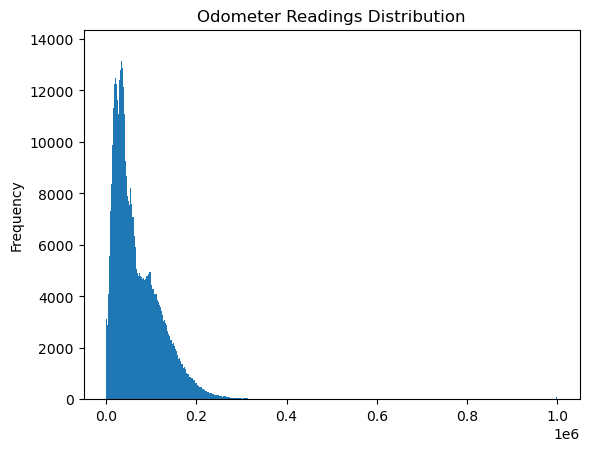

In [93]:
df['odometer'].plot(kind='hist', bins=500, title='Odometer Readings Distribution')

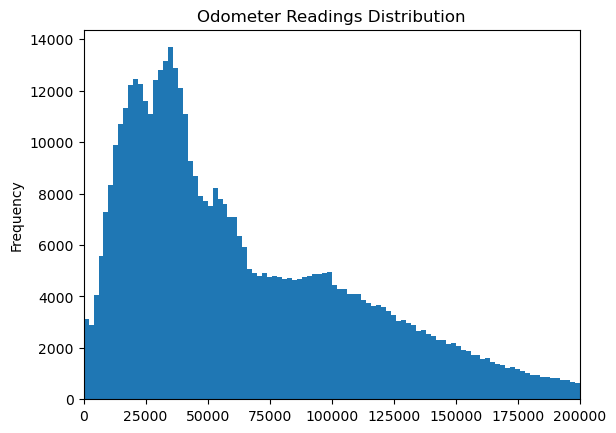

In [94]:
import matplotlib.pyplot as plt

# Your histogram plotting command
df['odometer'].plot(kind='hist', bins=500, title='Odometer Readings Distribution')

# Now, adjust the x-axis to view only from 0 to 0.2
plt.xlim(0, 200000)

# Show the plot, especially necessary if you're not in a Jupyter notebook
plt.show()

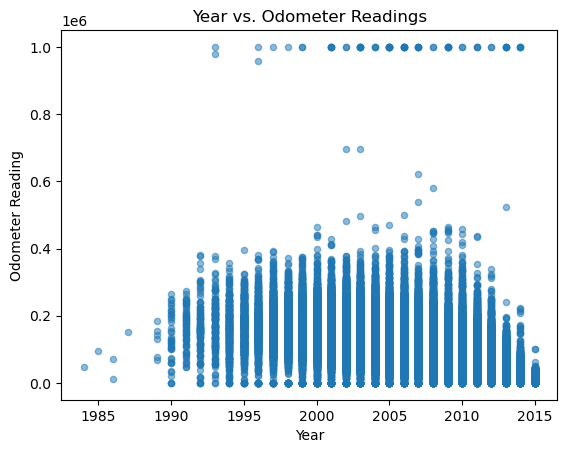

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'year' and 'odometer' are columns in your DataFrame df
df.plot(kind='scatter', x='year', y='odometer', alpha=0.5)
plt.title('Year vs. Odometer Readings')
plt.xlabel('Year')
plt.ylabel('Odometer Reading')
plt.show()


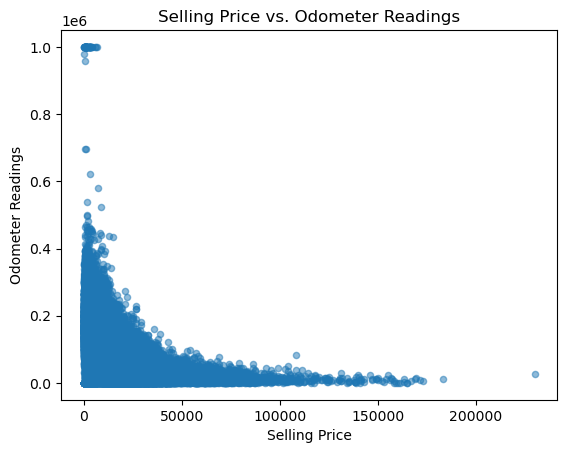

In [96]:
# Assuming 'year' and 'odometer' are columns in your DataFrame df
df.plot(kind='scatter', x='sellingprice', y='odometer', alpha=0.5)
plt.title('Selling Price vs. Odometer Readings')
plt.xlabel('Selling Price')
plt.ylabel('Odometer Readings')
plt.show()

In [97]:
unique_state = df['state'].unique()
unique_state

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut', 'mo',
       'nv', 'ma', 'pr', 'ny', 'or', 'wa', 'la', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

In [98]:
unique_state_counts = df['state'].value_counts()
unique_state_counts

state
fl    74664
ca    66556
pa    50289
tx    40475
ga    32370
nj    25273
il    21148
nc    20194
oh    19991
mi    15063
tn    14699
mo    14475
va    11054
nv    10753
md    10303
wi     8980
az     8327
mn     8256
co     7512
wa     7070
ma     6434
ny     5409
in     4219
ne     3946
sc     3940
on     2876
pr     2656
la     1815
ut     1725
ms     1660
hi     1140
or     1114
qc     1085
ab      794
nm      143
ok       55
ns       46
al       25
Name: count, dtype: int64

In [99]:
df.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5XYKTCA69FG566472    ca        5.0   16639.0  white    black   
1  5XYKTCA69FG561319    ca        5.0    9393.0  white    beige   
2  WBA3C1C51EK116351    ca       45.0    1331.0   gray    black   
3  YV1612TB4F1310987    ca       41.0   14282.0  white    black   
4  WBA6B2C57ED129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [100]:
# Assuming df is your DataFrame and 'date_column' is the column you want to check
pattern = r'(\bMon|\bTue|\bWed|\bThu|\bFri|\bSat|\bSun) (\bJan|\bFeb|\bMar|\bApr|\bMay|\bJun|\bJul|\bAug|\bSep|\bOct|\bNov|\bDec) (\d{1,2}) (\d{4}) (\d{2}:\d{2}:\d{2}) (GMT[+-]\d{4}) (\([A-Z]{2,4}\))'

# Apply the regex pattern to each value in the column and check if all values match
all_match = df['saledate'].str.match(pattern).all()

print(f"Do all values in 'date_column' match the specified format? {all_match}")


Do all values in 'date_column' match the specified format? True


In [101]:
import re

# Define the function to extract the year
def extract_year(sale_date):
    pattern = r'\b\d{4}\b'
    match = re.search(pattern, sale_date)
    if match:
        return int(match.group())  # Convert the matched year to an integer
    else:
        return None  # Return None if no year is found

# Apply the function to the 'saledate' column to create a new 'saleyear' column in the existing DataFrame
df['saleyear'] = df['saledate'].apply(extract_year)

# df now has a new column 'saleyear' in addition to its original columns

df.head()


year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5XYKTCA69FG566472    ca        5.0   16639.0  white    black   
1  5XYKTCA69FG561319    ca        5.0    9393.0  white    beige   
2  WBA3C1C51EK116351    ca       45.0    1331.0   gray    black   
3  YV1612TB4F1310987    ca       41.0   14282.0  white    black   
4  WBA6B2C57ED129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  saleyear  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)      2014  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)      2014  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)      2015  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)      2015  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)      2014

In [102]:
# Look for null values
print(df.isnull().sum())


year                0
make                0
model              76
trim              308
body             2563
transmission    57973
vin                 0
state               0
condition        6325
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
saleyear            0
dtype: int64


In [103]:
unique_interior = df['interior'].unique()
unique_interior

array(['black', 'beige', 'tan', 'gray', 'brown', 'burgundy', 'white',
       'silver', 'cream', 'blue', 'red', 'yellow', 'green', 'purple',
       'orange', 'gold'], dtype=object)

In [104]:
# Assuming `df` is your DataFrame and 'seller' is the column of interest
unique_interior_counts = df['interior'].value_counts()
unique_interior_counts

interior
black       228993
gray        167871
beige        55807
tan          40848
brown         7961
red           1238
blue          1046
silver        1045
cream          344
purple         314
gold           289
white          230
green          225
burgundy       172
orange         131
yellow          20
Name: count, dtype: int64

In [105]:
min_mmr = df['mmr'].min()
max_mmr = df['mmr'].max()

print(f"Minimum mmr value: {min_mmr}")
print(f"Maximum mmr value: {max_mmr}")

Minimum mmr value: 25.0
Maximum mmr value: 182000.0


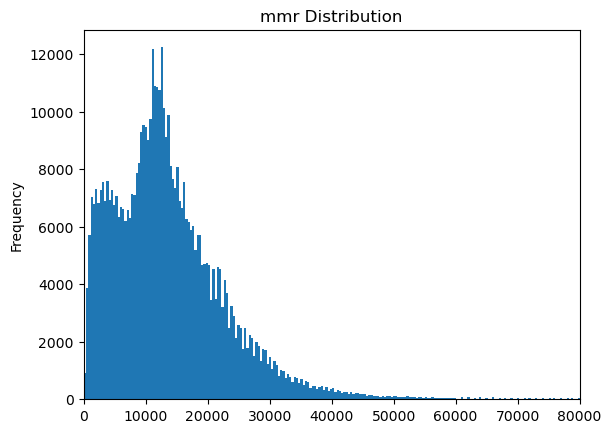

In [106]:
# Your histogram plotting command
df['mmr'].plot(kind='hist', bins=500, title='mmr Distribution')

# Now, adjust the x-axis to view only from 0 to 0.2
plt.xlim(0, 80000)

# Show the plot, especially necessary if you're not in a Jupyter notebook
plt.show()

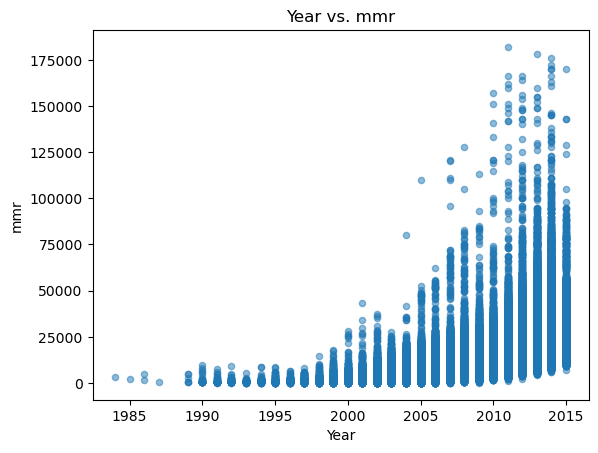

In [107]:
# Assuming 'year' and 'odometer' are columns in your DataFrame df
df.plot(kind='scatter', x='year', y='mmr', alpha=0.5)
plt.title('Year vs. mmr')
plt.xlabel('Year')
plt.ylabel('mmr')
plt.show()

In [108]:
unique_mmr = df['mmr'].unique()
print(unique_mmr)

[ 20500.  20800.  31900. ... 125000. 119000. 164000.]


In [109]:
unique_mmr_counts = df['mmr'].value_counts()
unique_mmr_counts

mmr
11650.0     1638
12500.0     1624
12150.0     1600
11300.0     1590
11850.0     1587
11600.0     1579
11750.0     1573
11350.0     1564
12350.0     1562
11050.0     1559
11250.0     1555
11700.0     1553
12200.0     1552
12700.0     1551
12750.0     1548
12050.0     1548
11950.0     1544
11500.0     1543
11900.0     1540
11400.0     1538
12400.0     1531
12000.0     1531
11550.0     1523
10950.0     1520
12650.0     1519
12600.0     1519
11800.0     1516
12800.0     1516
12450.0     1514
11150.0     1513
11450.0     1502
12100.0     1501
12250.0     1500
11100.0     1499
11200.0     1499
12300.0     1482
12950.0     1481
12850.0     1464
13000.0     1456
11000.0     1453
10900.0     1450
12550.0     1435
10850.0     1425
10800.0     1423
13050.0     1417
12900.0     1417
10650.0     1406
13100.0     1381
13400.0     1375
10750.0     1370
10500.0     1369
10700.0     1350
10600.0     1331
10150.0     1329
13450.0     1312
10100.0     1311
10200.0     1309
13300.0     1305
10050.0   

In [110]:
unique_sellingprice_counts = df['sellingprice'].value_counts()
unique_sellingprice_counts


sellingprice
11000.0     4116
12000.0     4066
13000.0     3941
10000.0     3708
11500.0     3571
14000.0     3550
12500.0     3462
9000.0      3382
10500.0     3267
9500.0      3105
15000.0     3092
11800.0     3039
13500.0     3036
8500.0      2893
8000.0      2848
16000.0     2837
11600.0     2818
12800.0     2811
12600.0     2800
11200.0     2772
11400.0     2752
17000.0     2736
7000.0      2668
10800.0     2646
12200.0     2645
18000.0     2637
4000.0      2592
14500.0     2573
6000.0      2566
10200.0     2544
10600.0     2533
13800.0     2529
13600.0     2483
13200.0     2472
12400.0     2462
7500.0      2447
11300.0     2417
3000.0      2415
11900.0     2413
5000.0      2408
3500.0      2402
9800.0      2382
10400.0     2376
11700.0     2374
13400.0     2366
9600.0      2355
10900.0     2350
20000.0     2338
19000.0     2321
16500.0     2318
11100.0     2303
9200.0      2303
10700.0     2279
12100.0     2273
10100.0     2272
9700.0      2270
12900.0     2266
4500.0      2266
6

In [111]:
import pandas as pd

# Assuming df is your DataFrame and 'date_column' is the column you want to check
pattern = r'(\bMon|\bTue|\bWed|\bThu|\bFri|\bSat|\bSun) (\bJan|\bFeb|\bMar|\bApr|\bMay|\bJun|\bJul|\bAug|\bSep|\bOct|\bNov|\bDec) (\d{1,2}) (\d{4}) (\d{2}:\d{2}:\d{2}) (GMT[+-]\d{4}) (\([A-Z]{2,4}\))'

# Apply the regex pattern to each value in the column and check if all values match
all_match = df['saledate'].str.match(pattern).all()

print(f"Do all values in 'date_column' match the specified format? {all_match}")


Do all values in 'date_column' match the specified format? True


In [112]:
# Assuming df is your DataFrame and 'date_column' is the column you want to check
pattern = r'(\bMon|\bTue|\bWed|\bThu|\bFri|\bSat|\bSun) (\bJan|\bFeb|\bMar|\bApr|\bMay|\bJun|\bJul|\bAug|\bSep|\bOct|\bNov|\bDec) (\d{1,2}) (\d{4}) (\d{2}:\d{2}:\d{2}) (GMT[+-]\d{4}) (\([A-Z]{2,4}\))'

# Apply the regex pattern to each value in the column
matches = df['saledate'].str.match(pattern)

# Count the number of True values, which indicate matches
num_matches = matches.sum()

print(f"Number of values in 'date_column' that match the specified format: {num_matches}")


Number of values in 'date_column' that match the specified format: 506534


In [113]:
import pandas as pd

# Assuming df is your DataFrame and 'date_column' is the column you want to check
pattern = r'(\bMon|\bTue|\bWed|\bThu|\bFri|\bSat|\bSun) (\bJan|\bFeb|\bMar|\bApr|\bMay|\bJun|\bJul|\bAug|\bSep|\bOct|\bNov|\bDec) (\d{1,2}) (\d{4}) (\d{2}:\d{2}:\d{2}) (GMT[+-]\d{4}) (\([A-Z]{2,4}\))'

# Apply the regex pattern to each value in the column
matches = df['saledate'].str.match(pattern)

# Count the number of False values, which indicate non-matches
num_non_matches = len(df['saledate']) - matches.sum()

print(f"Number of values in 'date_column' that do not match the specified format: {num_non_matches}")


Number of values in 'date_column' that do not match the specified format: 0


In [ ]:
# Apply the regex pattern to each value in the column to get a mask of matches
matches = df['saledate'].str.match(pattern)

# Fill NaN values with False, as we treat missing values as non-matches
matches = matches.fillna(False)

# Invert the mask to identify non-matches
non_matches_mask = ~matches

# Use the mask to filter the original DataFrame, keeping only non-matching rows
df_non_matches = df[non_matches_mask]
df_non_matches